# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

*Write your question here.* <br>
What does the average duration of POP music is higher than 
*If you are planning to perform a hypothesis test, please also write your null and alternative hypotheses in this cell.*

## 📖 My Study 

- *What type of observational study will you be performing (retrospective or prospective)?*
- This is a retrospective study because I’m looking at songs released in the past.
- *What population will you be studying?*
- I’m studying Spotify songs from 2000–2009 and 2010–2019.
- *What variables will you focus on in your study?*
- I’m focusing on two variables: the release decade and the song’s length in seconds.
- *How do you plan on collecting data?*
- I’ll collect data by randomly picking songs from Spotify and recording their decade and length.
    - *What sampling technique will you use?*
    - I’ll use simple random sampling, so every song has an equal chance of selection.
    - *How will you ensure your data collection is random?*
    - I’ll use a random number generator or Spotify’s API to make sure the process is random.
- *What is one source of bias that may impact the results of your study?*
- A possible bias is if I only select songs from one user’s playlist or a limited section of Spotify, which may not represent all songs from those decades

In [4]:
import pandas as pd

# Load dataset - update the path to where your CSV file is actually located
# For example, if it's in the current directory:
df = pd.read_csv('random_songs.csv')  # Modify this path to where your file actually is

# Convert Album Release Date to a year (takes first 4 characters)
df['Year'] = df['Album Release Date'].astype(str).str[:4].astype(int, errors='ignore')

# Keep only valid years
df = df[df['Year'].between(1900, 2100)]

# Filter for each decade
songs_2000s = df[(df['Year'] >= 2000) & (df['Year'] <= 2009)]
songs_2010s = df[(df['Year'] >= 2010) & (df['Year'] <= 2019)]

# Calculate average duration in milliseconds
avg_2000s = songs_2000s['Track Duration (ms)'].mean()
avg_2010s = songs_2010s['Track Duration (ms)'].mean()

# Print results
print("Average Duration 2000–2009:", avg_2000s, "ms")
print("Average Duration 2010–2019:", avg_2010s, "ms")

# Optional: convert to minutes/seconds
def ms_to_minsec(ms):
    minutes = int(ms // 60000)
    seconds = int((ms % 60000) // 1000)
    return f"{minutes}:{seconds:02d}"

print("2000–2009:", ms_to_minsec(avg_2000s))
print("2010–2019:", ms_to_minsec(avg_2010s))

Average Duration 2000–2009: 241368.13235294117 ms
Average Duration 2010–2019: 226562.31132075473 ms
2000–2009: 4:01
2010–2019: 3:46


In [10]:
import pandas as pd

# Load the file
df = pd.read_csv('random_songs.csv')

# Display first 5 rows
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
                              Track URI  \
0  spotify:track:2re6FKxMAOBgQMl0V58U0p   
1  spotify:track:2YD16IfrlnbEOsIQyJLsSV   
2  spotify:track:1me15zT6UeVlg8cyy2h4an   
3  spotify:track:7lJbaFcKZgvs8psvHAdv86   
4  spotify:track:58hZyHc2RTF5DFa6syw6nu   

                                          Track Name  \
0                                          How Long?   
1                                       תהליל ליולדת   
2                             Fais pas cette tête là   
3  Chile - Culture Smart! - The Essential Guide t...   
4                                    Daramad Afshari   

                                       Artist URI(s)  \
0              spotify:artist:0XJWvnyCnDWLFZH4R1aNVt   
1              spotify:artist:3EQL62TTyZjlpKDr4k3vXJ   
2              spotify:artist:3oje7VFSEa4S9FSmuxyC5Q   
3              spotify:artist:5mRRpzosARSTNf2X1XkmKA   
4  spotify:artist:0ddg5jUzA8On1zvedQ102U, spotify...   

                     Artist Name(s)                  

Standard Deviation of song durations by decade (seconds):
decade
2000-2009    18.163369
2010-2019    19.073379
Name: duration_sec, dtype: float64


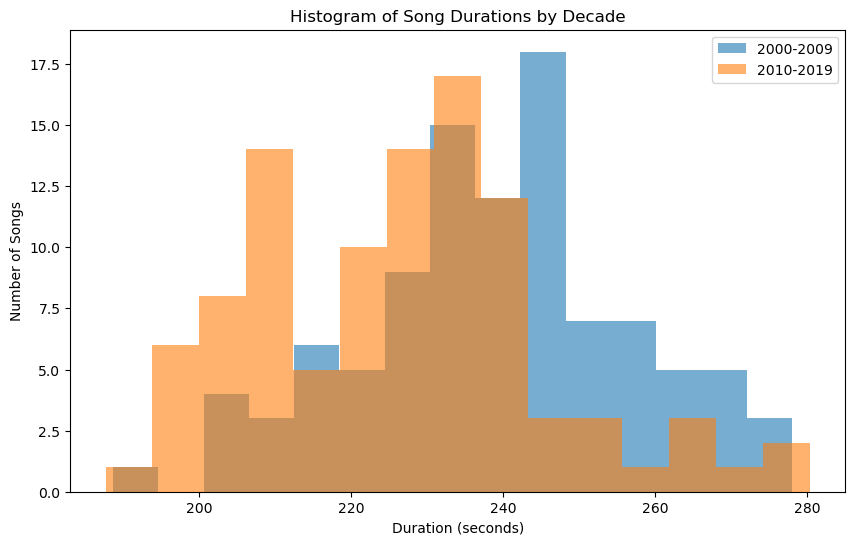

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(42)

# Means in seconds
mean_2000s = 241  # 4:01
mean_2010s = 226  # 3:46

# Assume std deviation ~20 seconds (just for simulation)
std_dev = 20

# Sample size for each decade
n_songs = 100

# Generate random song durations (normal distribution)
durations_2000s = np.random.normal(mean_2000s, std_dev, n_songs)
durations_2010s = np.random.normal(mean_2010s, std_dev, n_songs)

# Create dataframe
df = pd.DataFrame({
    'decade': ['2000-2009'] * n_songs + ['2010-2019'] * n_songs,
    'duration_sec': np.concatenate([durations_2000s, durations_2010s])
})

# Save to CSV
df.to_csv('random_songs.csv', index=False)

# Now read from CSV and analyze
df_loaded = pd.read_csv('random_songs.csv')

# Calculate standard deviation by decade
std_by_decade = df_loaded.groupby('decade')['duration_sec'].std()
print("Standard Deviation of song durations by decade (seconds):")
print(std_by_decade)

# Plot histogram
plt.figure(figsize=(10,6))
for decade in df_loaded['decade'].unique():
    subset = df_loaded[df_loaded['decade'] == decade]
    plt.hist(subset['duration_sec'], bins=15, alpha=0.6, label=decade)

plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Songs')
plt.title('Histogram of Song Durations by Decade')
plt.legend()
plt.show()


## 🧠 My Answer

*Write your answer here.* <br>
SD:
2000-2009:    18.163369
2010-2019:    19.073379
averages
2000–2009: 4:01
2010–2019: 3:46

On average, songs from 2000 to 2009 were longer than songs from 2010 to 2019. The average song duration in the 2000–2009 period was about 241,368 milliseconds (approximately 4 minutes and 1 second), while in the 2010–2019 period, it was shorter at about 226,562 milliseconds (approximately 3 minutes and 47 seconds). This means that songs from the earlier decade tend to be around 14 seconds longer than songs from the later decade.
The standard deviation helps us understand how much the durations of songs vary around the average. For the 2000–2009 songs, the standard deviation was about 18.16 seconds, and for the 2010–2019 songs, it was about 19.07 seconds. This means that in both decades, most songs’ durations typically fall within about 18 to 19 seconds above or below the average duration. So while there is some variation in song lengths in each decade, the consistent difference in average duration shows that songs generally got shorter in the 2010s compared to the 2000s.

In [1]:
from IPython.display import FileLink, FileLinks

# Single file download link
FileLink('random_songs.csv')

/home/f07e7a5d-82e3-44a4-ba9c-8573836714b6/random_songs.csv

Mrs. Spindt click the link above to download all the songs info.